In [1]:
# Load Libraries
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import sqlite3
import matplotlib.pyplot as plt


In [2]:
# Define the default ticker to evaluate
default_ticker = "XOM"  # Change dynamically via Flask/JS in future
print(f"Evaluating model for Ticker: {default_ticker}")

Evaluating model for Ticker: XOM


In [3]:

# Path to SQLite database and saved models
db_path = 'database/stocks_data.db'

# Load Test Data
with sqlite3.connect(db_path) as conn:
    query = "SELECT * FROM processed_stocks"  # Replace with test data query if different
    data = pd.read_sql(query, conn)

print(f"Loaded data for evaluation: {data.shape[0]} rows")


Loaded data for evaluation: 107322 rows


In [4]:
# Load the model and scaler for the selected ticker
model_path = f'models/model_{default_ticker}.pkl'
scaler_path = f'models/scaler_{default_ticker}.pkl'

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

print(f"Loaded model and scaler for Ticker: {default_ticker}")

Loaded model and scaler for Ticker: XOM


In [5]:

# Define features and target
features = ['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']
target = 'Adj Close'

X = data[features]
y = data[target]

# Normalize the features
X_scaled = scaler.transform(X)

# Reshape the features for LSTM (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Make Predictions
y_pred = model.predict(X_scaled)

# Evaluate Model Performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


3354/3354 ━━━━━━━━━━━━━━━━━━━━ 1s 212us/step
Model Evaluation Metrics:
Mean Squared Error (MSE): 1.87
R² Score: 1.00


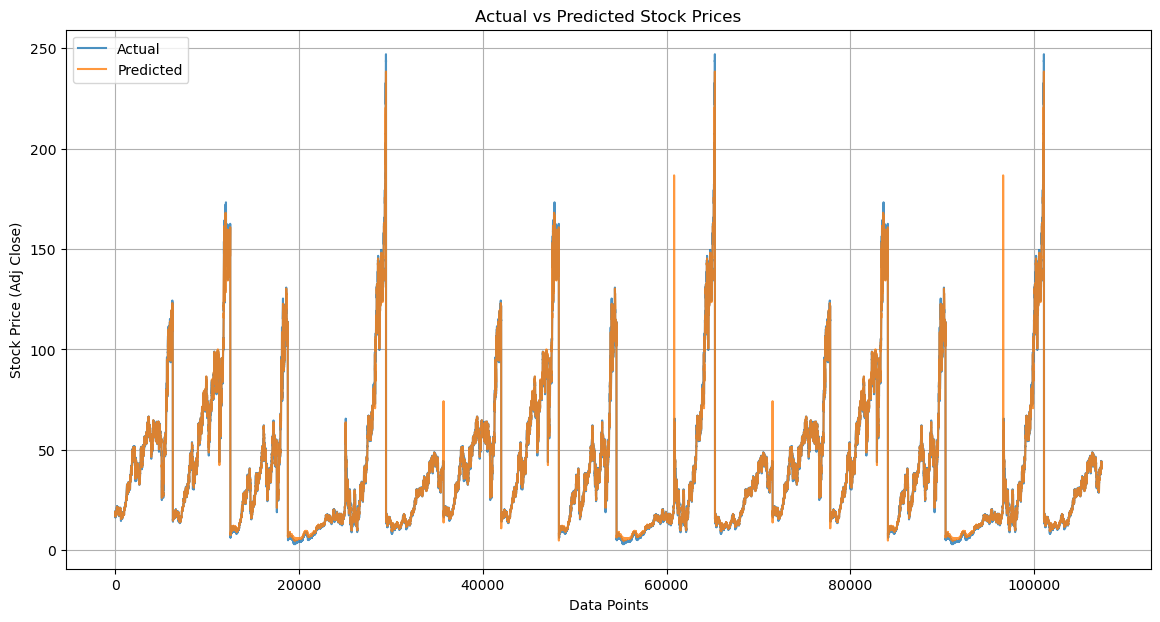

In [6]:

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(14, 7))
plt.plot(y.values, label='Actual', alpha=0.8)
plt.plot(y_pred.flatten(), label='Predicted', alpha=0.8)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Data Points')
plt.ylabel('Stock Price (Adj Close)')
plt.legend()
plt.grid()
plt.show()


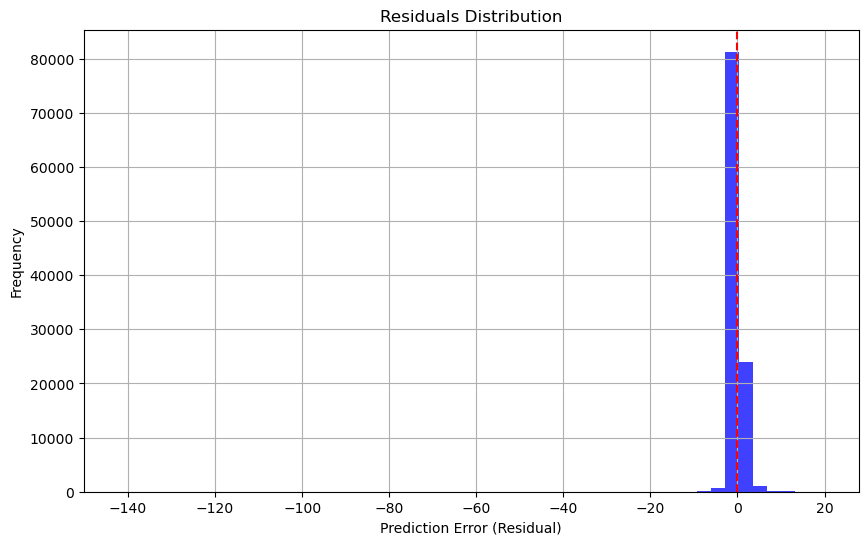

In [7]:

# Visualization: Prediction Error (Residuals)
residuals = y - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.75, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual Line")
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


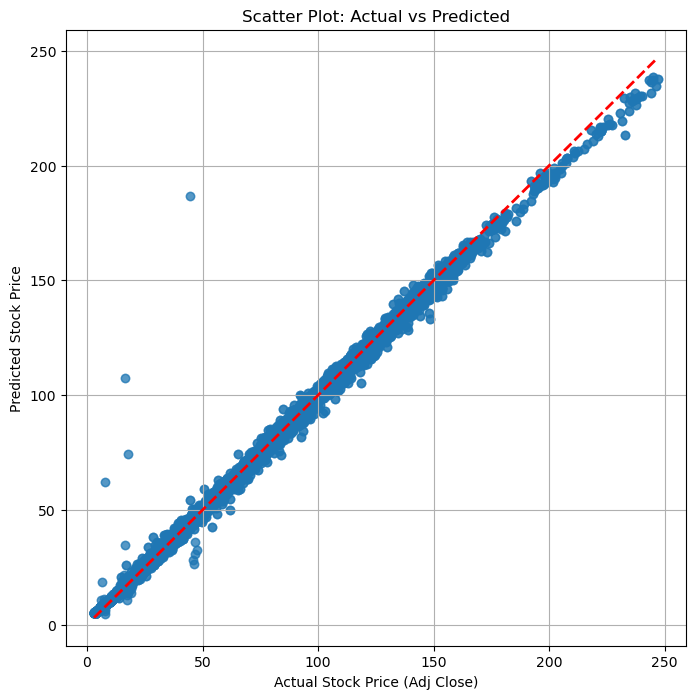

Evaluation results saved to 'lstm_evaluation_results.csv'


In [8]:

# Visualization: Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)
plt.title('Scatter Plot: Actual vs Predicted')
plt.xlabel('Actual Stock Price (Adj Close)')
plt.ylabel('Predicted Stock Price')
plt.grid()
plt.show()

# Optional: Save Predictions to a CSV File
results = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred.flatten(),
    'Residual': residuals
})
results.to_csv('lstm_model_results.csv', index=False)
print("Evaluation results saved to 'lstm_evaluation_results.csv'")